# Aquisição dos Dados

Aqui os dados foram baixados usando [Kaggle's API](https://github.com/Kaggle/kaggle-api#api-credentials). Siga o link para instruções de como utilizá-la.

## Para uso no Google's Colab 

In [ ]:
# For google colab only
!pip install kaggle

In [ ]:
# Upload api key kaggle.json
from google.colab import files
files.upload()

In [ ]:
# Create folder /.kaggle
!mkdir -p ~/.kaggle
# Move API key to folder
!cp kaggle.json ~/.kaggle/

## Comece Aqui!

Pesquisar as competições com o termo **taxi**

In [1]:
!kaggle competitions list -s taxi

ref                                        deadline             category       reward  teamCount  userHasEntered  
-----------------------------------------  -------------------  ----------  ---------  ---------  --------------  
nyc-taxi-trip-duration                     2017-09-15 23:59:00  Playground    $30,000       1257           False  
new-york-city-taxi-fare-prediction         2018-09-25 23:59:00  Playground  Knowledge       1488            True  
pkdd-15-predict-taxi-service-trajectory-i  2015-07-01 23:59:00  Research         $250        381           False  
pkdd-15-taxi-trip-time-prediction-ii       2015-07-01 23:59:00  Research         $250        345           False  


Selecionar a competição de interesse, nesse caso, **New York City Taxi Fare Prediction**.

In [2]:
!kaggle competitions files -c new-york-city-taxi-fare-prediction

name                           size  creationDate         
----------------------------  -----  -------------------  
sample_submission.csv         335KB  2018-07-17 17:27:19  
test.csv                      960KB  2018-07-24 23:29:50  
train.csv                       5GB  2018-07-25 00:41:39  
GCP-Coupons-Instructions.rtf   486B  2018-07-24 23:29:48  


Finalmente, baixar os arquivos usando a API na pasta `data`.

In [3]:
!mkdir data_taxi

J  existe uma subpasta ou um arquivo data_taxi.


In [ ]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction -p data_taxi

# EDA
Agora que os dados estão disponíveis, podemos explorá-los. Nessa etapa, os dados serão analisados e visualizados com o intuito de se obter insights e informações adicionais.

Inicialmente, vamos dá uma olhada superficial na descrição disponível dos dados. No prórprio site da competição do [Kaggle](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data) pode-se notar que os dados de treinamento correspondem a **5.3GB** e as sequintes informações sobre as colunas.


## Features (Colunas)

Aqui podemos notar quais são as **Features** de cada observação e suas respectivas descrições.

- **key**: string única para identificar a corrida - 🆔
- **fare_amount** : Tarifa da corrida - 🎯
- **pickup_datetime**: Valor indicando quando a corrida começou.
- **pickup_longitude**: Longitude no início da corrida.
- **pickup_latitude**: Latitude no início da corrida inicial.
- **dropoff_longitude**: Longitude no final da corrida inicial.
- **dropoff_latitude** : Latitude no final da corrida inicial.
- **passenger_count** : Número de passageiros na corrida.



**OBS.:Aqui algumas medidas foram tomadas em relação ao tamanho do dataset. Os dados corresponde a 55 milhões de observações, porém apenas 3 milhões foram carregados para possibilitar a utilização dos dados de forma eficiente. Idealmente, todos os dados disponíveis seriam utilizados, mas, infelizmente, o hardware disponível não é capaz de carregar todos os dados na memória. Além disso, a coluna com `timestamps` já foi considerada no carregamento dos dados.**


In [4]:
# Import EDA libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
sns.set()

In [5]:
# Load data
train = pd.read_csv("data_taxi/train.csv", nrows=3000000, parse_dates=["pickup_datetime"], infer_datetime_format=True)
# test = pd.read_csv("data_taxi/test.csv", parse_dates=["pickup_datetime"], infer_datetime_format=True)

In [6]:
# Brief table visualization
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
# brief information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      datetime64[ns]
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 183.1+ MB


Vamos observar algumas estatísticas das colunas.

In [8]:
# Description of numeric variables
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,3.000000e+06,3.000000e+06,3.000000e+06,2.999977e+06,2.999977e+06,3.000000e+06
mean,1.134246e+01,-7.250894e+01,3.992033e+01,-7.250740e+01,3.991728e+01,1.684528e+00
std,9.828907e+00,1.320223e+01,8.644440e+00,1.308827e+01,9.984419e+00,1.329084e+00
min,-6.200000e+01,-3.426609e+03,-3.488080e+03,-3.408430e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073492e+01,-7.399139e+01,4.073402e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,2.912465e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [9]:
# Features
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [10]:
# Data size
train.shape

(3000000, 8)

## Limpeza

Agora que temos uma noção geral dos dados, vamos realizar algumas operações para verificar se se há dados faltando, duplicados ou outras inconsistências.

In [11]:
# Look for duplicates
train.duplicated().sum()

0

In [12]:
# Look for missing data
train.isna().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    23
dropoff_latitude     23
passenger_count       0
dtype: int64

In [13]:
sum(train['dropoff_longitude'].isna() & train['dropoff_latitude'].isna())

23

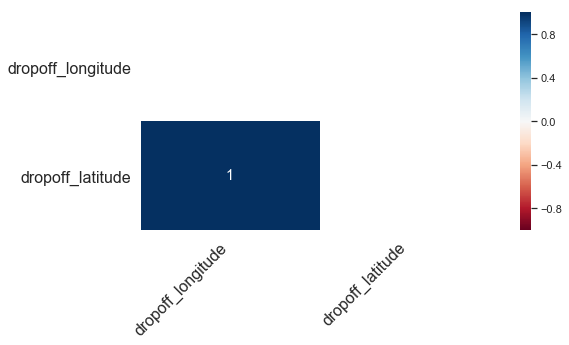

In [14]:
# Shows that missings values occurs simultaneously on both columns
msno.heatmap(train, figsize=(8, 4))

Pode-se notar que apenas as colunas `dropoff_longitude` e `dropoff_latitude` possuem dados faltando. Também é possível perceber que os dados estão faltando da mesma obsevação nas duas colunas. Além disso, nenhuma dado duplicado foi encontrado.

**Como o total de dados faltando corresponde a 23 observações, e isso representa apenas 0.00076% do total dos dados, podemos remover essas linhas ao invés de substituílos pela mediana ou outra estatística.**

In [15]:
# Cleaned data
c_train = train[train['dropoff_longitude'].notna()]
c_train.shape

(2999977, 8)

## Visualizar os Dados

Agora que só temos dados completos e não duplicados, vamos verificar a consistência dos valores das colunas. Para isso, iremos plotar algumas visualizações.

In [16]:
# Description numeric values
c_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06
mean,1.134238e+01,-7.250895e+01,3.992034e+01,-7.250740e+01,3.991728e+01,1.684541e+00
std,9.828730e+00,1.320222e+01,8.644442e+00,1.308827e+01,9.984419e+00,1.329081e+00
min,-6.200000e+01,-3.426609e+03,-3.488080e+03,-3.408430e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073492e+01,-7.399139e+01,4.073402e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,2.912465e+03,3.457622e+03,3.345917e+03,2.080000e+02


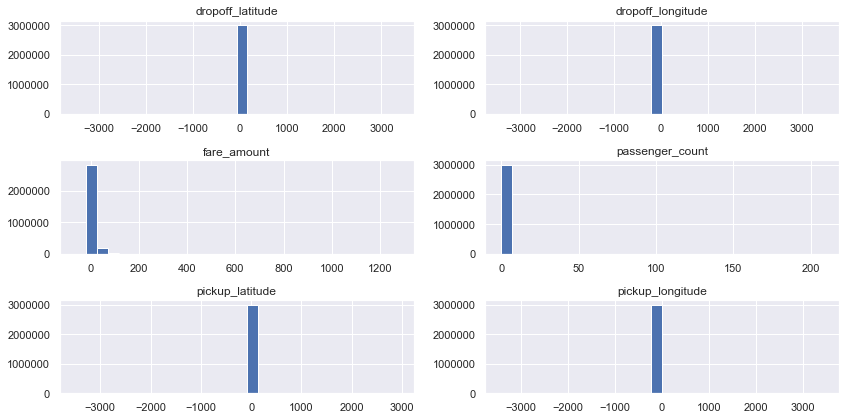

In [17]:
# Values distribution
c_train.hist(bins=30, figsize=(12, 6))
plt.tight_layout()

Aqui podemos notar um problema comum em todas as colunas, **Outliers**.

Para lidarmos com esse problema devemos ter certo conhecimento sobre o problema em si. Então, iremos analisar cada tipo de coluna isoladamente.

### Removendo Outliers
**Outliers** por definição são dados peculiarmente distantes dos demais valores. Eles podem ser erros de digitação, leitura de sensores, ruído, ou um dado real extraordinário.
Agora, vamos verificar os dados para cada tipo de coluna.


#### 1. Dados de Latitudes e Longitudes - *Dropoff* e *Pickup*
Um rápida busca no site [BoundingBox](https://boundingbox.klokantech.com/) nos mostra os limites aproximados de latitude/longitude da região ao entorno da cidade de Nova York.
- Limites de Longitude: [-74.26, -73.70]
- Limites de Latitude: [ 40.48, 40.92]

![](https://i.imgur.com/nIwyc8l.png)

Assim, podemos esses dados como referência de limite para os dados de latitude e longitude. Fazendo essa escolha, estamos limitando os dados para a região próxima de Nova York, que é onde há a maior ocorrências de dados.

#### 2. Dados Numéricos - Tarifa e Passageiros
As outras colunas, `fare_amount` e `passenger_count` são valores numéricos. 
Por razões óbvias, podemos definir que o valor da tarifa deve ser **maior que zero**, caso contrário, o taxi não em serviço. Enquanto que o número de passageiros pode ser **maior ou igual a zero**, já que o taxi pode ir pegar alguém vazio e cobrar pelo trajeto, por exemplo. De acordo com o site do [Aeroporto Internacional de Nova York](https://www.jfkairport.com/to-from-airport/taxi-car-and-van-service) o número máximo de passageiros em um taxi na cidade é de **5**, então temos o nosso limite superior de `passenger_count`.
Para o limite superior de `fare_amount` podemos usar a regra prática de remover valores acima de [Q3](https://pt.wikipedia.org/wiki/Quartil) + 1.5 [IQR](https://pt.wikipedia.org/wiki/Amplitude_interquartil). Nesse caso, seremos mais conservadores e removeremos apenas valores acima de Q3 + 5IQR.

Assim, podemos iniciar o processo de remoção dos **Outliers**.

In [18]:
# Remove all lattitude and longitude below threhold
lat_min = 40.48
lon_min = -74.26
lat_max = 40.92
lon_max = -73.70

# Remove all negative values and above Q3 + 5 IQR
fare_iqr = c_train['fare_amount'].quantile(.75) - c_train['fare_amount'].quantile(.25)
fare_max = c_train['fare_amount'].quantile(.75) + 5 * fare_iqr
passenger_max = 5

# Data without outliers
o_train = c_train[((c_train['dropoff_longitude'] <= lon_max) &
                   (c_train['dropoff_longitude'] >= lon_min) &
                   (c_train['pickup_longitude'] <= lon_max) &
                   (c_train['pickup_longitude'] >= lon_min) &
                   (c_train['dropoff_latitude'] <= lat_max) &
                   (c_train['dropoff_latitude'] >= lat_min) &
                   (c_train['pickup_latitude'] <= lat_max) &
                   (c_train['pickup_latitude'] >= lat_min) &
                   (c_train['fare_amount'] > 0) &
                   (c_train['fare_amount'] <= fare_max) &
                   (c_train['passenger_count'] >= 0) &
                   (c_train['passenger_count'] <= passenger_max))].copy()
# Data shrink
print("Data reduced " + f"{100 - (o_train.shape[0] / c_train.shape[0] * 100):.2f}" + "%")

Data reduced 6.21%


Agora, se dermos uma olhada nos nossos dados novamente. Teremos distribuições mais mais plausíveis para as variáveis.

In [19]:
# New description
o_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.813656e+06,2.813656e+06,2.813656e+06,2.813656e+06,2.813656e+06,2.813656e+06
mean,1.036353e+01,-7.397732e+01,4.075176e+01,-7.397546e+01,4.075194e+01,1.590449e+00
std,6.913527e+00,2.914736e-02,2.508249e-02,2.951490e-02,2.931153e-02,1.156118e+00
min,1.000000e-02,-7.425918e+01,4.048254e+01,-7.425958e+01,4.048345e+01,0.000000e+00
25%,6.000000e+00,-7.399239e+01,4.073712e+01,-7.399158e+01,4.073630e+01,1.000000e+00
50%,8.100000e+00,-7.398222e+01,4.075364e+01,-7.398071e+01,4.075411e+01,1.000000e+00
75%,1.210000e+01,-7.396896e+01,4.076768e+01,-7.396588e+01,4.076849e+01,2.000000e+00
max,4.500000e+01,-7.370023e+01,4.091955e+01,-7.370011e+01,4.091987e+01,5.000000e+00


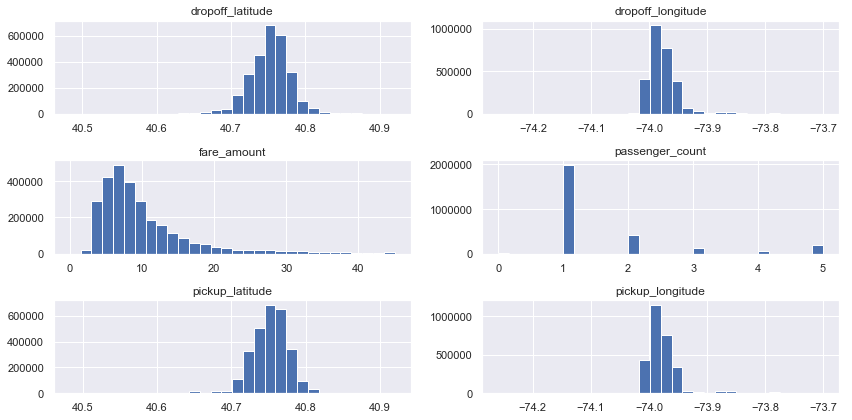

In [20]:
o_train.hist(bins=30, figsize=(12, 6))
plt.tight_layout()

### Dados Geográficos

Vamos visualizar os dados geográficos do usando o `folium`. 

Primeiramente, vamos verificar os locais de pick-up mais frequentes. Para facilitar a renderização dos resultados iremos retirar amostras dos dados.

In [21]:
import folium
import numpy as np
from folium import plugins

# Workaround function for jupyter lab map display
def embed_map(m, name):
    from IPython.display import IFrame

    m.save(name)
    return IFrame(name, width='100%', height='750px')

In [22]:
# Folium's Map object
m = folium.Map(location=[(lat_max - lat_min)/2 + lat_min,
                         (lon_max - lon_min)/2 + lon_min], zoom_start=11)

# All coordinates of 100k samples
samples_100k = o_train.sample(100000)
pickup_coords = list(zip(samples_100k['pickup_latitude'],
                         samples_100k['pickup_longitude'],
                         np.ones(len(samples_100k['pickup_latitude']))*.15))

plugins.HeatMap(pickup_coords, min_opacity=.2, radius=10, blur=5, ).add_to(m)
# m.save('pickup_Heatmap.html')
embed_map(m, 'pickup_Heatmap.html')


In [23]:
# Folium's Map object
m = folium.Map(location=[(lat_max - lat_min)/2 + lat_min,
                         (lon_max - lon_min)/2 + lon_min], zoom_start=11)

dropoff_coords = list(zip(samples_100k['dropoff_latitude'],
                          samples_100k['dropoff_longitude'],
                          np.ones(len(samples_100k['dropoff_latitude']))*.15))
plugins.HeatMap(dropoff_coords, min_opacity=.2, radius=10, blur=5).add_to(m)
# m.save('dropoff_Heatmap.html')
embed_map(m, 'dropoff_Heatmap.html')

In [24]:
# Folium's Map object
m = folium.Map(location=[(lat_max - lat_min)/2 + lat_min,
                         (lon_max - lon_min)/2 + lon_min], zoom_start=11)

# Hourly samples
hour_index = [f"{i:2d}:00" for i in range(24)]
pickup_hourly_samples = []
# Create data for each hour of the day
for i in range(24):
    hourly = samples_100k[samples_100k['pickup_datetime'].dt.hour == i]
    coords = list(map(list, zip(hourly['pickup_latitude'], 
                                hourly['pickup_longitude'],
                                np.ones(len(hourly.pickup_longitude))*.15)))
    pickup_hourly_samples.append(coords)

plugins.HeatMapWithTime(pickup_hourly_samples, index=hour_index,
                        min_opacity=0.2, max_opacity=1, radius=10).add_to(m)
# m.save('pickup_HeatmapTime.html')
embed_map(m, 'pickup_HeatmapTime.html')

In [25]:
# Folium's Map object
m = folium.Map(location=[(lat_max - lat_min)/2 + lat_min,
                         (lon_max - lon_min)/2 + lon_min], zoom_start=11)

# Hourly samples
hour_index = [f"{i:2d}:00" for i in range(24)]
dropoff_hourly_samples = []
# Create data for each hour of the day
for i in range(24):
    hourly = samples_100k[samples_100k['pickup_datetime'].dt.hour == i]
    coords = list(map(list, zip(hourly['dropoff_latitude'], 
                                hourly['dropoff_longitude'],
                                np.ones(len(hourly.pickup_longitude))*.15)))
    dropoff_hourly_samples.append(coords)

plugins.HeatMapWithTime(dropoff_hourly_samples, index=hour_index,
                        min_opacity=.2, max_opacity=1, radius=10, ).add_to(m)
# m.save('dropoff_HeatmapTime.html')
embed_map(m, 'dropoff_HeatmapTime.html')

Podemos notar algumas coisas. Nos primeiros mapas, os lugares onde os passeios terminam tende a ser a mais espalhados do centro da cidade. Nos mapas com variação do tempo, temos o êxodo esperado ao longo do dia e a redução de demanda com o ciclo dia/noite da cidade.

## Procurar por Correlações

Verificando as correlações das variáveis com a nossa variável alvo, podemos tirar conclusões sobre as variáveis mais **importantes** ou possívelmente **redudantes**.

In [26]:
corr_matrix = o_train.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount          1.000000
dropoff_longitude    0.345355
pickup_longitude     0.312644
passenger_count      0.008940
pickup_latitude     -0.094043
dropoff_latitude    -0.104449
Name: fare_amount, dtype: float64

Text(0.5, 1.0, 'Correlation with Fare Amount')

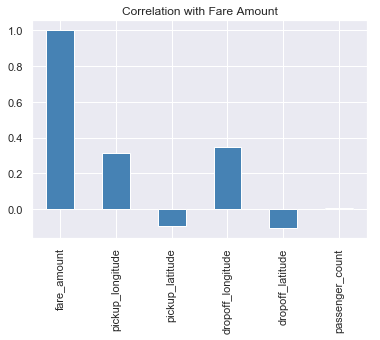

In [27]:
corr_matrix['fare_amount'].plot.bar(color = 'steelblue');
plt.title('Correlation with Fare Amount')

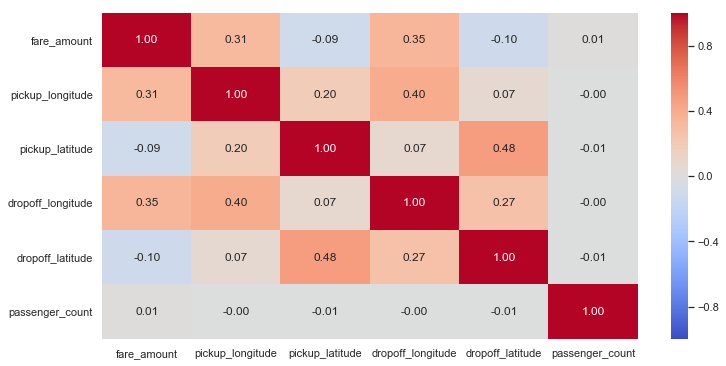

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1., vmax=1.)

Temos os sequintes problemas:
- As informações da coluna `pickup_datetime` não está incluída.
- Baixa correlações entre as variáveis e a variável alvo
- Correlações entre variáveis mostrando redundância.

Felizmente, esses problemas podem ser resolvidos no próximo tópico.

## Feature Engineering

Aqui vamos tentar combinar/manipular as colunas para que as informações presentes nelas fiquem o mais claro possível.
### 1. Dados de Geolocalização

Anteriormente, vimos que as variáveis de latitude de longitude possuiam uma grande correlação entre si, mostrando que continham informação redundante. Desse modo, vamos combinar essas variáveis de partida e chegada em um única variável, `distance`. Para isso, poderíamos usar a [Fórmula de Vincenty](https://en.wikipedia.org/wiki/Vincenty%27s_formulae) implementada na biblioteca `geopy`. Entretanto, devido a grande quantidade de dados presentes, a [Fórmula de Heaversine](https://en.wikipedia.org/wiki/Haversine_formula) foi utilizada por produzir resultados similares com um gigantesco ganho em tempo de computação.

### 2. DateTime

Vamos dividir a coluna `pickup_datatime` em informações mais direta e útil. Por exemplo, podemos transformá-la em:
- `weekday`, dia da semana.
- `month`, mês.
- `hour`, hora.
- `is_holiday`, se é feriado.

In [29]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from geopy.distance import distance # Not used
# # Vincenty distance - OBS.: SLOW!
# o_train['distance'] = o_train.apply(lambda x: distance((x['pickup_latitude'],
#                                                         x['pickup_longitude']),
#                                                        (x['dropoff_latitude'],
#                                                         x['dropoff_longitude'])).km, axis=1)

# Heaversine distance vectorized
def heaversine_distance(df): 
    """
    Calculates heaversine distance of train df. 
    """
    # Earth radius
    R = 6373.0
    # Lat and lon as radians
    lat1 = np.radians(df.pickup_latitude.values)
    lat2 = np.radians(df.dropoff_latitude.values)
    lon1 = np.radians(df.pickup_longitude.values)
    lon2 = np.radians(df.dropoff_longitude.values)
    # Heaversine formulae
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2 ) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    heav_distances = R * c
    
    return heav_distances

o_train['distance'] = heaversine_distance(o_train)

In [30]:
# Add new columns with detailed information from datetime
o_train['weekday'] = o_train.pickup_datetime.dt.weekday.copy()
o_train['month'] = o_train.pickup_datetime.dt.month.copy()
o_train['hour'] = o_train.pickup_datetime.dt.hour.copy()

# Create calendar object
cal = calendar()
holidays = cal.holidays(start=o_train.pickup_datetime.min(), end=o_train.pickup_datetime.max())
o_train['is_holiday'] = o_train.pickup_datetime.isin(holidays).astype('int')

In [31]:
o_train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance', 'weekday', 'month', 'hour',
       'is_holiday'],
      dtype='object')

In [32]:
# Total observations on holiday days
o_train.is_holiday.sum()

23

In [33]:
# Remove old redundant columns
f_train = o_train[['key', 'fare_amount', 'passenger_count','weekday',
                   'month', 'hour', 'is_holiday', 'distance']]
f_train.head(10)

,key,fare_amount,passenger_count,weekday,month,hour,is_holiday,distance
0,2009-06-15 17:26:21.0000001,4.5,1,0,6,17,0,1.031088
1,2010-01-05 16:52:16.0000002,16.9,1,1,1,16,0,8.452786
2,2011-08-18 00:35:00.00000049,5.7,2,3,8,0,0,1.389961
3,2012-04-21 04:30:42.0000001,7.7,1,5,4,4,0,2.800149
4,2010-03-09 07:51:00.000000135,5.3,1,1,3,7,0,1.999784
5,2011-01-06 09:50:45.0000002,12.1,1,3,1,9,0,3.788428
6,2012-11-20 20:35:00.0000001,7.5,1,1,11,20,0,1.556295
7,2012-01-04 17:22:00.00000081,16.5,1,2,1,17,0,4.156749
8,2012-12-03 13:10:00.000000125,9.0,1,0,12,13,0,1.253625
9,2009-09-02 01:11:00.00000083,8.9,2,2,9,1,0,2.850521


Com esses dados em uma melhor formatação, podemos testar hipóteses, verificar resultados e remover ruídos dos dados. Antes vamos verificar se melhoramos as correlações entre as **novas variáveis numéricas** e a **variável alvo**.

In [34]:
# New Correlation matrix
corr_matrix = f_train.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount        1.000000
distance           0.863250
month              0.027180
passenger_count    0.008940
weekday            0.008776
is_holiday        -0.000192
hour              -0.020220
Name: fare_amount, dtype: float64

Text(0.5, 1.0, 'Correlation with Fare Amount')

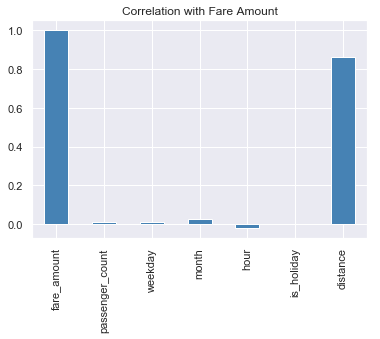

In [35]:
corr_matrix['fare_amount'].plot.bar(color = 'steelblue');
plt.title('Correlation with Fare Amount')

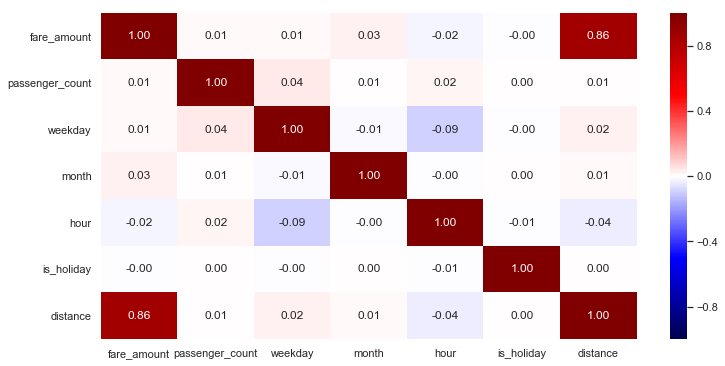

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt=".2f", cmap='seismic', vmin=-1., vmax=1.)

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


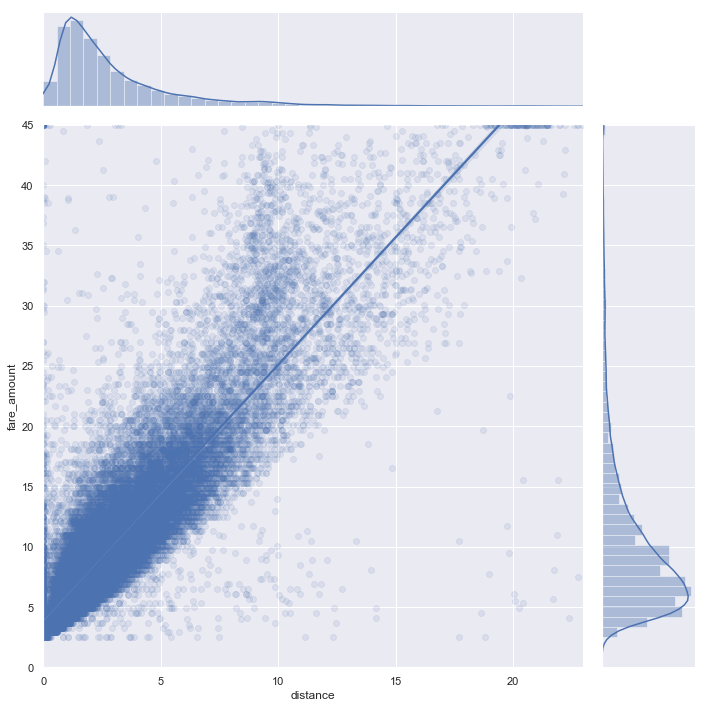

In [37]:
# Check correlation between variables
sns.jointplot(x='distance', y='fare_amount', data=f_train.sample(50000), joint_kws={'scatter_kws': {'alpha': 0.1}},
              kind='reg', height=10, ylim=[0, 45], xlim=[0, 23])

In [38]:
from bokeh.plotting import output_file, figure, show, save
from bokeh.models.tools import HoverTool
from bokeh.io import output_notebook

# Notebook mode
output_notebook()

# New sample for manipulated df
samples_30k = f_train.sample(30000)
x = samples_30k['distance']
y = samples_30k['fare_amount']
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"
p = figure(title="Distance X Fare", tools=TOOLS,
           y_range=(y.min(), y.max()), x_range=(x.min(), x.max()))

p.circle('distance', 'fare_amount', source=samples_30k)
p.xaxis[0].axis_label = 'Distance (km)'
p.yaxis[0].axis_label = 'Fare ($)'

p.hover.tooltips = [
    # add to this
    ("(Distance, Fare)", "(@distance, @fare_amount)"),
]
#save(p, 'scatter.html')
from IPython import html


# Check correlation between variables
# sns.scatterplot(x='distance', y='fare_amount', data=f_train[columns].sample(100000))

Loading BokehJS ...

c:\program files\python36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Podemos ver uma melhora considerável de correlação com a nova variável `distance` **(.86)**, que subtituiu as variáveis de geolocalização. Também podemos notar que nenhuma variável possui muita correlação entre si, portanto, não temos variáveis redundantes. 

Porém, as novas variáveis `is_holiday`, `week_day`, `hour` e `month` apresentaram pouquíssima correlação com a variável alvo. Mostrando que talvez essas variáveis não alterem tanto o valor das viagens.

## Outras estatísticas

Agora como os dados organizados, podemos verificar dados temporais, como o número de viagens em cada mês, ou como o faturamento dos taxis muda ao longo do ano.


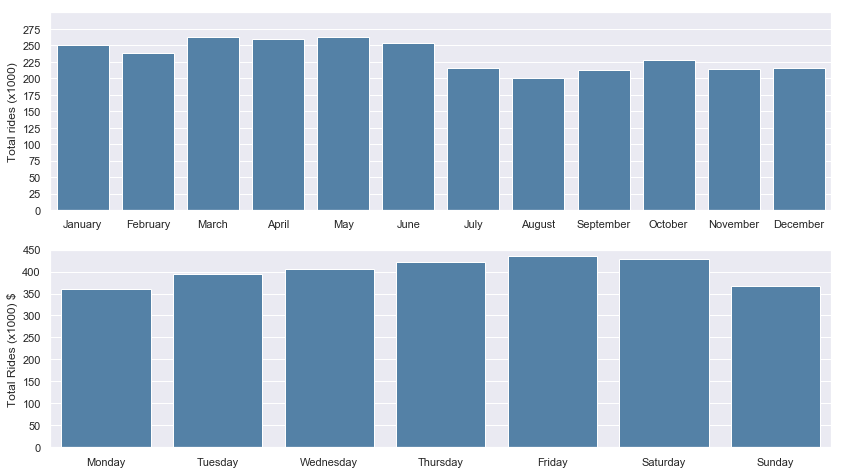

In [39]:
# Plot rides per month
months = pd.date_range('2018-01-01', periods=12, freq='M').month_name()
rides_month = f_train.groupby('month')['key'].count() / 1000
rides_month.name = 'Total rides (x1000)'

# Plot rides per week
weeks = pd.date_range('2018-01-01', periods=7, freq='D').day_name()
rides_week = f_train.weekday.value_counts().sort_index() / 1000.
rides_week.name = 'Total Rides (x1000) $'

# Plots
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 8))
ax0.set_ylim(0, 300)
ax0.set_yticks(range(0, 300, 25))
sns.barplot(x=months, y=rides_month, color='steelblue', ax=ax0)

ax1.set_ylim(0, 450)
ax1.set_yticks(range(0, 500, 50))
sns.barplot(x=weeks, y=rides_week, color='steelblue', ax=ax1)


# Machine Learning - Criação de Modelos


Com os dados limpos e modificados, podemos prepará-los para modelos de ML/DL.

In [40]:
# Recap of data types
f_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2813656 entries, 0 to 2999999
Data columns (total 8 columns):
key                object
fare_amount        float64
passenger_count    int64
weekday            int64
month              int64
hour               int64
is_holiday         int32
distance           float64
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 182.5+ MB


In [41]:
# Recap of data format
print(f_train.shape)
f_train.head()

(2813656, 8)


,key,fare_amount,passenger_count,weekday,month,hour,is_holiday,distance
0,2009-06-15 17:26:21.0000001,4.5,1,0,6,17,0,1.031088
1,2010-01-05 16:52:16.0000002,16.9,1,1,1,16,0,8.452786
2,2011-08-18 00:35:00.00000049,5.7,2,3,8,0,0,1.389961
3,2012-04-21 04:30:42.0000001,7.7,1,5,4,4,0,2.800149
4,2010-03-09 07:51:00.000000135,5.3,1,1,3,7,0,1.999784


## Preparando as Variáveis para os Modelos
Agora, vamos manipular as variáveis para que elas reflitam corretamente o seu significado no modelo.

1. **Removendo Variáveis de Identificação**: Nesse caso, iremos remover a coluna `key` do nosso dataset.
2. **Modificando Variáveis Categóricas**: Como a única variável categórica é binárias (`is_holiday`), não precisamos usar nenhum transformação como *One-hot encoding*.
3. **Preparando Variáveis Cíclicas**: Variáveis cíclicas como `hour`, `weekday` e `month` devem ser manipuladas para que o seu comportamento cíclico seja incorporado no modelo. Assim, o modelo pode perceber que que segunda é próximo de domingo, ou que a hora 0 vem após a hora 23. Nesse caso, utilizaremos a transformação em funções trigonométricas `sin` e `cos`.
4. **Ajustando a Magnitude das Variáveis Numéricas**: Outra etapa muito importante que tem o propósito de ignorar a intensidade absoluta das variáveis. Assin, dando ênfase as variações relativas.
5. **Separando a Variável Alvo**: Nesse caso, iremos separa a variável `fare_amount` do restante do dataset.
6. **Dividindo o Dataset em Treino/Teste ou usando CV**: Usaremos uma proporção de 80% treino 20% teste, mas utilizaremos todo o dataset para CV.


In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Managing clyclic variables
f_train['hour_sin'] = np.sin(f_train.hour.copy() * (2. * np.pi / 24))
f_train['hour_cos'] = np.cos(f_train.hour.copy() * (2. * np.pi / 24))
f_train['weekday_sin'] = np.sin(f_train.weekday.copy() * (2. * np.pi / 7))
f_train['weekday_cos'] = np.cos(f_train.weekday.copy() * (2. * np.pi / 7))
f_train['month_sin'] = np.sin((f_train.month.copy() - 1) * (2. * np.pi / 12))
f_train['month_cos'] = np.cos((f_train.month.copy() - 1) * (2. * np.pi / 12))

# Scaling variables
scaler = MinMaxScaler()
scale_features = ['passenger_count', 'distance']
f_train['scaled_passenger_count'] = 0
f_train['scaled_distance'] = 0
f_train[['scaled_passenger_count', 'scaled_distance']] = scaler.fit_transform(f_train[scale_features].values)

# Features and target
x_cols = ['scaled_passenger_count', 'scaled_distance', 'is_holiday', 'hour_sin', 'hour_cos',
          'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']
X = f_train[x_cols]
y = f_train['fare_amount']

In [44]:
X.head()

,scaled_passenger_count,scaled_distance,is_holiday,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,0.2,0.023689,0,-0.965926,-0.258819,0.000000,1.000000,0.500000,-8.660254e-01
1,0.2,0.194204,0,-0.866025,-0.500000,0.781831,0.623490,0.000000,1.000000e+00
2,0.4,0.031935,0,0.000000,1.000000,0.433884,-0.900969,-0.500000,-8.660254e-01
3,0.2,0.064334,0,0.866025,0.500000,-0.974928,-0.222521,1.000000,6.123234e-17
4,0.2,0.045945,0,0.965926,-0.258819,0.781831,0.623490,0.866025,5.000000e-01


In [45]:
print(X.shape)
print(y.shape)

(2813656, 9)
(2813656,)


In [46]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2250924, 9)
(2250924,)
(562732, 9)
(562732,)


## Testando Modelos

Com os dados prontos para os modelos, podemos testá-los aplicando vários modelos. Inicialmente, os seguintes modelos foram testados:
- Regressão Linear: Modelo linear simples.
- Árvore de Decisão: Modelo de árvore simples.
- Random Forest: Conjunto de modelo de árvore.
- Boosting Algorithms: Algoritmos amplamente usados, similar ao random forest, mas com regularização.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [59]:
# SKlearn Models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

# Scores with x-validation
lin_scores = cross_val_score(lin_reg, 
                             X, 
                             y,
                             scoring="neg_mean_squared_error", 
                             cv=10,
                             n_jobs=6)
print("Linear Regression finished")
decision_scores = cross_val_score(tree_reg,
                                  X, 
                                  y,
                                  scoring = "neg_mean_squared_error", 
                                  cv=10,
                                  n_jobs=6)
print("Decision Tree Finished")
forest_scores = cross_val_score(forest_reg,
                                X, 
                                y,
                                scoring = "neg_mean_squared_error", 
                                cv=10,
                                n_jobs=6)
print("Random Forest Finished")

Linear Regression finished
Decision Tree Finished
Random Forest Finished


In [60]:
# Boost Models
xgb_reg = xgb.XGBRegressor()

# Scores with x-validation
xgb_scores = cross_val_score(xgb_reg, 
                             X, 
                             y,
                             scoring="neg_mean_squared_error", 
                             cv=10,
                             n_jobs=6)
print("XGBoost Finished")

XGBoost Finished


In [62]:
# Test Results
lin_rmse_scores = np.sqrt(-lin_scores)
decision_rmse_scores = np.sqrt(-decision_scores)
forest_rmse_scores = np.sqrt(-forest_scores)
xgb_rmse_scores = np.sqrt(-xgb_scores)

# Results
print("Linear Regression Results:")
# print(f"Test MSE: {lin_rmse_test:.2f}")
print(f"CV RMSE: {lin_rmse_scores.mean():.2f} +/- {lin_rmse_scores.std() * 2:.2f}\n")
print("Decision Tree Regressor Results:")
# print(f"Test MSE: {decision_rmse_test:.2f}")
print(f"CV RMSE: {decision_rmse_scores.mean():.2f} +/- {decision_rmse_scores.std() * 2:.2f}\n")
print("Random Forest Regressor Results:")
# print(f"Test MSE: {forest_rmse_test:.2f}")
print(f"CV RMSE: {forest_rmse_scores.mean():.2f} +/- {forest_rmse_scores.std() * 2:.2f}\n")
print("X-Gradient Boosting Results:")
# print(f"Test MSE: {xgb_rmse_test:.2f}")
print(f"CV RMSE: {xgb_rmse_scores.mean():.2f} +/- {xgb_rmse_scores.std() * 2:.2f}\n")

Linear Regression Results:
CV RMSE: 3.45 +/- 0.05

Decision Tree Regressor Results:
CV RMSE: 4.65 +/- 0.05

Random Forest Regressor Results:
CV RMSE: 3.56 +/- 0.04

X-Gradient Boosting Results:
CV RMSE: 3.24 +/- 0.04



### Sintonizando Hyper-parâmetros

Vamos testar vários valores de hyper-parametros para encontrarmos o melhor resultado possível do modelo.

In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {'max_depth': range(2, 10, 2),
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': range(100, 600, 100)
              }
grid_reg = GridSearchCV(xgb_reg,
                        parameters,
                        scoring='neg_mean_squared_error',
                        n_jobs=10,
                        cv=5)
grid_reg.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=10,
       param_grid={'max_depth': [6], 'learning_rate': [0.1], 'n_estimators': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [68]:
# Results
tunedxgb_rmse_scores = np.sqrt(-grid_reg.best_score_)
print(f"Best Parameters: {grid_reg.best_params_}")
print(f"Best Mean CV Score: {tunedxgb_rmse_scores}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best Mean CV Score: 3.2242909716821506


## Resultados

Aqui estão os resultados obtidos dos modelos testados.

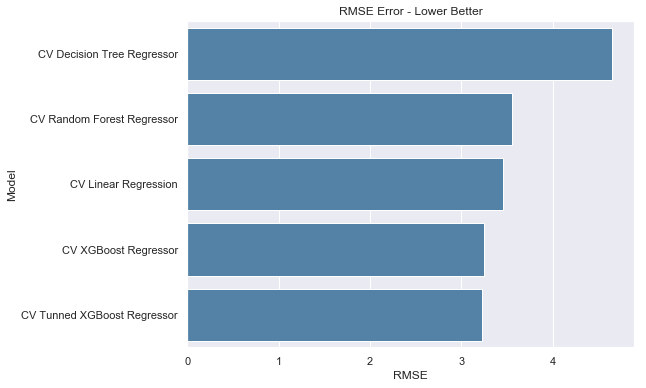

In [69]:
modelos = ["CV Decision Tree Regressor", "CV Random Forest Regressor", "CV Linear Regression",
           "CV XGBoost Regressor", "CV Tunned XGBoost Regressor"]
mses = [decision_rmse_scores.mean(), forest_rmse_scores.mean(), lin_rmse_scores.mean(),
        xgb_rmse_scores.mean(), tunedxgb_rmse_scores]

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("RMSE")
ax.set_ylabel("Model")
ax.set_title("RMSE Error - Lower Better")
sns.barplot(y=modelos, x=mses, color="steelblue", ax=ax)


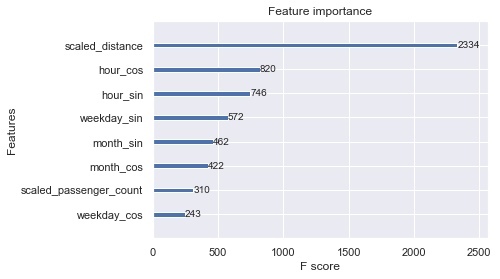

In [70]:
xgb.plot_importance(grid_reg.best_estimator_)

![](https://i.imgur.com/2f8L9Jq.png)
> Usando 5,5% dos dados

## Possíveis Melhorias

- Incluir os locais de partida e chegada
- Utilizar mais dados
- Continuar procurando melhores hyper-parâmetros
- Aplicar Deep Learning


# Submissão

Submissão no Kaggle compara resultados.

In [71]:
# Save model
import pickle
pickle.dump(grid_reg.best_estimator_, open("model_taxi.pt", "wb"))

In [80]:
# Load model
import pickle
best_model = pickle.load(open("model_taxi.pt", "rb"))

In [81]:
# Load test data
test = pd.read_csv("data_taxi/test.csv", parse_dates=["pickup_datetime"], infer_datetime_format=True)

# Manipulate and prepare
test['distance'] = heaversine_distance(test)
test['weekday'] = test.pickup_datetime.dt.weekday
test['month'] = test.pickup_datetime.dt.month
test['hour'] = test.pickup_datetime.dt.hour
test['is_holiday'] = test.pickup_datetime.isin(holidays).astype('int')
test['hour_sin'] = np.sin(test.hour.copy() * (2. * np.pi / 24))
test['hour_cos'] = np.cos(test.hour.copy() * (2. * np.pi / 24))
test['weekday_sin'] = np.sin(test.weekday.copy() * (2. * np.pi / 7))
test['weekday_cos'] = np.cos(test.weekday.copy() * (2. * np.pi / 7))
test['month_sin'] = np.sin((test.month.copy() - 1) * (2. * np.pi / 12))
test['month_cos'] = np.cos((test.month.copy() - 1) * (2. * np.pi / 12))
test['scaled_passenger_count'] = 0
test['scaled_distance'] = 0
test[['scaled_passenger_count', 'scaled_distance']] = scaler.transform(test[scale_features].values)

# Features and target
X_TEST = test[x_cols]

In [82]:
# Predicts results
sub_pred = best_model.predict(X_TEST)
# Save model

In [83]:
# Create submission file
submission = test[['key']].copy()
submission['fare_amount'] = sub_pred

submission.to_csv('submission.csv', index=False)

In [76]:
!kaggle competitions submit new-york-city-taxi-fare-prediction -f submission.csv -m "XGBoost"

Successfully submitted to New York City Taxi Fare Prediction



  0%|          | 0.00/379k [00:00<?, ?B/s]
  2%|2         | 8.00k/379k [00:00<00:13, 28.7kB/s]
 27%|##7       | 104k/379k [00:00<00:06, 40.5kB/s] 
 55%|#####4    | 208k/379k [00:00<00:03, 56.9kB/s]
100%|##########| 379k/379k [00:00<00:00, 80.1kB/s]
